# COVID-19-Regional Portugal - Last 60 Days Daily Evolution  

<div style="float:right; a.color: grey;">
        <a href="https://github.com/matosdotnet">
        <img src="https://avatars3.githubusercontent.com/u/64945038?s=60&v=4">
        matosdotnet
    </a>
</div>

<ul> 
        <li>New Cases</li>
        <li>New Deaths</li>
        <li>New Suspects</li>
        <li>New Recovered</li>
      </ul>
<div>
       Data Source: 
        <a href="https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv">https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv</a>
       <br/>
Ref:
        <br/>
        <a href="https://covid19.min-saude.pt/relatorio-de-situacao/">DGS Reports<a>
        <br/>
        <a href="https://github.com/dssg-pt/covid19pt-data">covid19pt-data<a>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import datetime
%matplotlib inline

# Define the last number of days here
nr_last_days = 60
s_title = 'COVID-19 Regional Portugal'
s_url = 'https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv'
s_local_snapshot_path = 'data-pt.csv'

In [2]:
#define dictionaries with metadata
d_confirmations = {'key' : 'confirmados', 'label' : 'Cases', 'color' : '#00D0FE'}
d_new_confirmations = {'key' : 'confirmados_novos', 'label' : 'New Cases', 'color' : '#00D0FE'}

d_deaths = {'key' : 'obitos', 'label' : 'Deaths', 'color' : '#FE0004'}
d_new_deaths = {'key' : 'obitos_novos', 'label' : 'New Deaths', 'color' : '#FE0004'}

d_suspects = {'key' : 'suspeitos', 'label' : 'Suspects', 'color' : '#FE6C00'}
d_new_suspects = {'key' : 'suspeitos_novos', 'label' : 'New Suspects', 'color' : '#FE6C00'}

d_recoveries = {'key' : 'recuperados', 'label' : 'Recoveries', 'color' : '#7FFE00'}
d_new_recoveries = {'key' : 'recuperados_novos', 'label' : 'New Recoveries', 'color' : '#7FFE00'}

d_patients = {'key' : 'internados', 'label' : 'Patients', 'color' : '#FEFE00'}
d_new_patients = {'key' : 'internados_novos', 'label' : 'New Patients', 'color' : '#FEFE00'}

d_icu = {'key' : 'internados_uci', 'label' : 'ICU Patients', 'color' : '#FEFE00'}
d_new_icu = {'key' : 'internados_uci_novos', 'label' : 'New ICU Patients', 'color' : '#FEFE00'}

d_active = {'key' : 'activos', 'label' : 'Active', 'color' : '#FE0004'}
d_new_active = {'key' : 'activos_novos', 'label' : 'New Active', 'color' : '#FE00F6'}

d_tested = {'key' : 'lab', 'label' : 'Tested', 'color' : '#FE0004'}
d_new_tested = {'key' : 'lab_novos', 'label' : 'New Tested', 'color' : '#FE00C4'}

l_regions = ['arsnorte','arscentro','arslvt','arsalentejo','arsalgarve','acores','madeira']

In [3]:
def read_data_remote() : 
    # Read Source Data
    df_full = pd.read_csv(s_url)
    # Manage Dates Formating and Set Index
    df_full['data'] = df_full['data'].apply(lambda x : pd.to_datetime(x,format='%d-%m-%Y'))
    df_full['data_dados'] = df_full['data_dados'].apply(lambda x : pd.to_datetime(x,format='%d-%m-%Y %H:%M'))
    df_full = df_full.set_index('data_dados')
    df_full.fillna(0, inplace=True)
    #Active
    df_full[d_active['key']] = df_full[d_confirmations['key']] - df_full[d_recoveries['key']]- df_full[d_deaths['key']]
    #Create regional Active cases
    for region in l_regions :
        df_full['{}_{}'.format(d_active['key'],region)] = df_full['{}_{}'.format(d_confirmations['key'],region)] - df_full['{}_{}'.format(d_recoveries['key'],region)]- df_full['{}_{}'.format(d_deaths['key'],region)]
    #Create daily new and % change
    temp_df = df_full.drop(['data','confirmados_novos'],axis=1)    
    df_full[temp_df.add_suffix('_novos_pct').columns] = df_full[temp_df.columns].pct_change()
    df_full[temp_df.add_suffix('_novos').columns] = df_full[temp_df.columns].diff()     
    # Save a snapshot
    df_full.to_csv(s_local_snapshot_path)
    return df_full
    
def read_data_local() : 
    df_full = pd.read_csv(s_local_snapshot_path)
    df_full['data'] = df_full['data'].apply(lambda x : pd.to_datetime(x))
    df_full['data_dados'] = df_full['data_dados'].apply(lambda x : pd.to_datetime(x))
    df_full = df_full.set_index('data_dados')
    return df_full
    
def read_data() : 
    df_full = pd.DataFrame()
    try:
        df_full = read_data_remote()
    except:
        df_full = read_data_local()
        print("An exception occurred reading data from {}\nAlternatively the latest Snapshot from {} was retrieved.".format(s_url,df_full.index.max()))
    else:
         print("Data collected sucessfully from {}\nMax data set date: {}".format(s_url,df_full.index.max()))          
    return df_full

In [4]:
#Read Data
df_full  = read_data()
# Slice the last days
df_latest = df_full.tail(nr_last_days )

Data collected sucessfully from https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv
Max data set date: 2020-05-28 00:00:00


In [5]:
df_latest[[d_confirmations['key'],d_new_confirmations['key'],d_deaths['key'],d_new_deaths['key'],d_suspects['key'],d_new_suspects['key'],d_recoveries['key'],d_new_recoveries['key'],d_icu['key'],d_new_icu['key'],d_new_active['key'],d_new_tested['key']]].tail(1)

,confirmados,confirmados_novos,obitos,obitos_novos,suspeitos,suspeitos_novos,recuperados,recuperados_novos,internados_uci,internados_uci_novos,activos_novos,lab_novos
data_dados,,,,,,,,,,,,
2020-05-28,31596,304.0,1369,13.0,318810,2446.0,18637,288.0,65.0,-1.0,3.0,-576.0


In [6]:
# Last X count days overall description
df_latest[[d_new_confirmations['key'],d_new_deaths['key'],d_new_suspects['key'],d_new_recoveries['key'],d_new_patients['key'],d_new_icu['key'],d_new_active['key'],d_new_tested['key']]].describe()

,confirmados_novos,obitos_novos,suspeitos_novos,recuperados_novos,internados_novos,internados_uci_novos,activos_novos,lab_novos
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,427.233333,20.833333,4679.466667,309.900000,0.433333,-1.216667,96.500000,-69.966667
std,269.648822,8.383128,3636.031215,1285.730798,55.885891,12.378346,1359.744287,605.224261
min,92.000000,6.000000,161.000000,0.000000,-96.000000,-40.000000,-9706.000000,-2102.000000
25%,222.000000,14.000000,2559.000000,15.000000,-27.000000,-7.000000,104.750000,-235.250000
50%,358.500000,20.000000,3732.500000,46.500000,-10.000000,-3.000000,240.500000,-45.500000
75%,599.250000,27.250000,6300.500000,165.250000,9.250000,3.000000,506.000000,185.000000
max,1516.000000,37.000000,24893.000000,9844.000000,316.000000,42.000000,1462.000000,1586.000000


In [7]:
def line_plot_df_tindex(y,data,title,ylabel,ycolor,window_span=7,bollinger_type='EMA'):
    '''
    bollinger_type: 
                    'EMA' Exponential moving average
                    'MA' Moving average
    '''
    #Mean ans Standar Deviations
    v_mean = data[y].mean()
    v_std =  data[y].std()
    
    v_df_averages    = pd.Series([], dtype= 'float64')
    v_df_upper_stds  = pd.Series([], dtype= 'float64')
    v_df_lower_stds  = pd.Series([], dtype= 'float64')
    
    if bollinger_type == 'MA': 
        v_df_averages = data[y].rolling(window=window_span).mean()
        v_df_upper_stds = v_df_averages + 2*data[y].rolling(window=window_span).std()
        v_df_lower_stds = v_df_averages - 2*data[y].rolling(window=window_span).std()
    elif bollinger_type == 'EMA': 
        v_df_averages = data[y].ewm(span=window_span).mean()
        v_df_upper_stds = v_df_averages + 2*data[y].ewm(span=window_span).std()
        v_df_lower_stds = v_df_averages - 2*data[y].ewm(span=window_span).std()
    else :
        return 0
    
    #Set Style
    sns.set_style('darkgrid', 
              {
                  'axes.facecolor': '#646666',
                  'figure.facecolor': '#646666',
                  'grid.color': 'lightgrey',
                  'grid.linestyle': 'dotted',
                  'xtick.color': 'white',
                  'xtick.top': False,
                  'xtick.bottom': True,
                  'ytick.color': 'white',
                  'ytick.left': True,
                  'ytick.right': False,
                  'axes.labelcolor': 'white',
                  'axes.spines.top': False,
                  'axes.spines.right': False,
                  'text.color': 'white'
                  
              })
 
    #Set Fig Size
    fig = plt.figure(figsize=(12,5))

    ax = sns.lineplot(x=data.index,y=v_df_averages
                      ,color = '#5CFE00'
                      ,alpha = 0.2        
                      ,dashes=True
                     # ,estimator = 'mean'
                     )
    
    #Line Plots for Mean and Standard Deviation
    ax = sns.lineplot(x=data.index,y=v_df_upper_stds
                      ,color = '#5CFE00'
                      ,alpha = 0.2        
                      ,dashes=True
                     # ,estimator = 'mean'
                     )
    
    ax.lines[1].set_linestyle('dotted')    
    ax = sns.lineplot(x=data.index,y=v_df_lower_stds
                      ,color = '#5CFE00'
                      ,alpha = 0.2        
                      ,dashes=True
                     # ,estimator = 'mean'
                     )
    ax.lines[2].set_linestyle('dotted')
    
    #Line Plot with data

    ax = sns.lineplot(x=data.index,y=data[y]
                      ,marker=True
                      ,markers=["o", "o"]
                      ,alpha = 0.5
                      ,dashes=False
                      ,style=True
                      ,hue = 1
                      ,palette = [ycolor]
                     # ,estimator = 'mean'
                     )

    # Rerieve Max, Min and Latest
    y_max = data[y].max()
    x_max = data[[y]].idxmax()[0]
    y_min = data[y].min()
    x_min = data[[y]].idxmin()[0]
    y_mean = y_max+y_max*0.10
    x_mean = data[[y]].index[0]
    x_latest =  data.index.max()
    y_latest = data[x_latest:x_latest][y][0]

    # Slice the chart canvas
    ax.set_xlim(data.index.min(), data.index.max()+datetime.timedelta(days=1))
      
    if y_min >= 0 :
        ax.set_ylim(0, y_max+y_max*0.10)
    else :
        ax.set_ylim(y_min+y_min*0.10, y_max+y_max*0.10)

    #Set Date Format
    str_date_format = '%d/%m'

    #Anotattions for Max, Min and Latest
    lbl_y_offset = 0.02*y_max
    lbl_y_max_offset = 0.02*y_max
    lbl_y_min_offset = 0.02*y_min

    ax.annotate('  MAX: {0:.0f} \n {1}'.format(y_max,x_max.strftime(str_date_format))
                ,xy=(x_max,y_max)
                ,xytext=(x_max,y_max+lbl_y_max_offset)
                ,ha='center')
    
    if (x_min != x_max) :
        ax.annotate('  MIN: {0:.0f} \n {1}'.format(y_min,x_min.strftime(str_date_format))
                ,xy=(x_min,y_min)
                ,xytext=(x_min,y_min+lbl_y_min_offset)
                ,ha='center')

    if (x_latest != x_max) and (x_latest!= x_min) :
        ax.annotate('  {0:.0f} \n {1}'.format(y_latest,x_latest.strftime(str_date_format))
                ,xy=(x_latest,y_latest)
                ,xytext=(x_latest,y_latest+lbl_y_offset)
                ,ha='center')
    
    plt.figtext(0.1, 0.05,'x̄: {0:.1f} σ: {1:.1f} : {2}[x̄ +- 2σ] N={3:.0f}'.format(v_mean,v_std,bollinger_type,window_span)
               #,ha='right'
               ,color='#5CFE00') 
    
    #Axis and Labels formating
    ax.set_title(title)
    
    #Make sure the dataset has continuous dates in the DataFrame
    ax.set_xlabel('Last {0} days'.format(len(data.index)))
    ax.set_ylabel(ylabel)

    myFmt = mdates.DateFormatter(str_date_format)
    ax.xaxis.set_major_formatter(myFmt)
    ax.legend().remove()

    # Fill Area
    plt.fill_between( data.index, data[y], color=ycolor, alpha=0.2)
    
    #fig.savefig("{}.png".format(title),bbox_inches = 'tight', dpi=plt.gcf().dpi,facecolor='#646666')
    fig.savefig("{}.png".format(title),bbox_inches = 'tight', dpi=300,facecolor='#646666')
    
    plt.show()

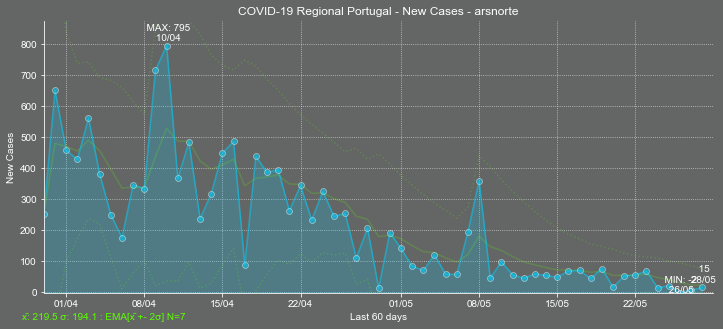

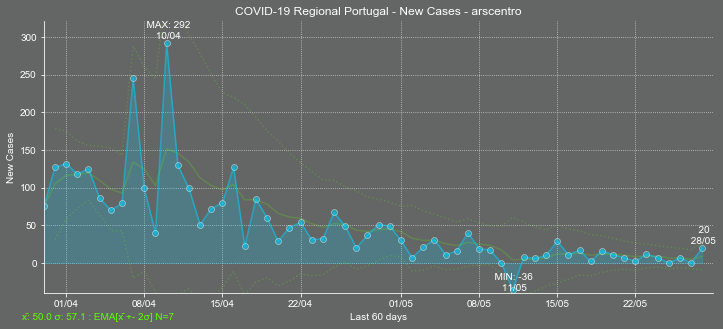

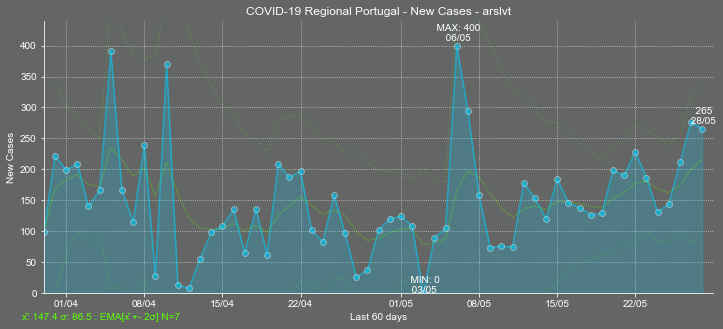

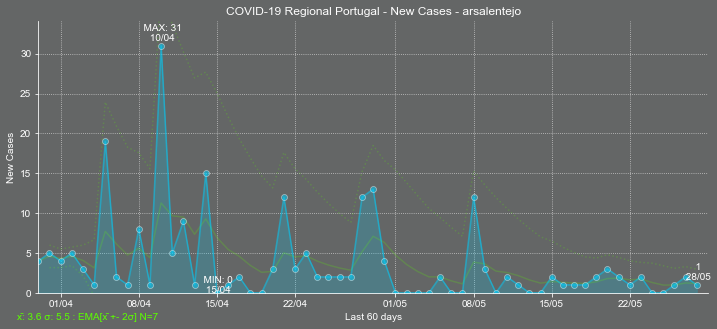

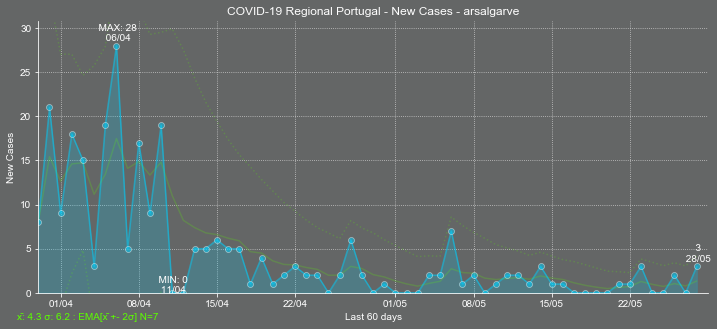

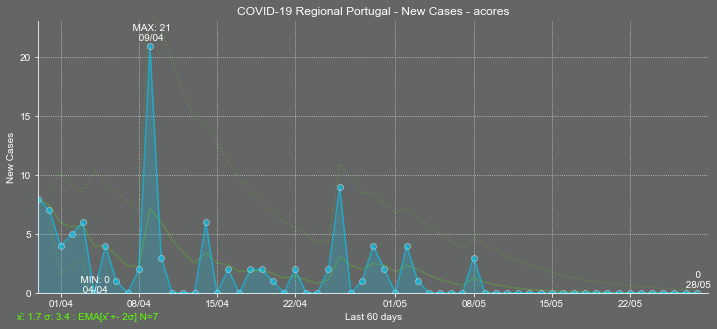

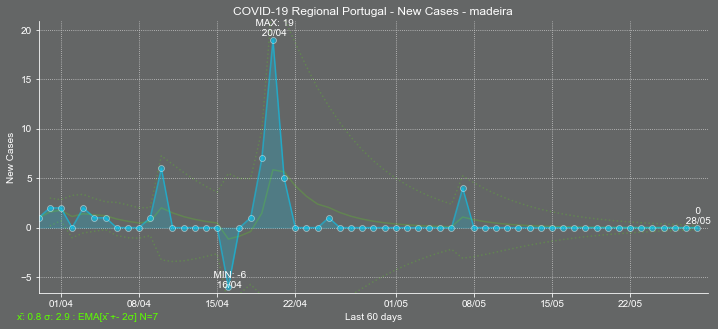

In [8]:
#from MatosDotNetStandardCharts import line_plot_df_tindex 
for region in l_regions :
        line_plot_df_tindex(
                '{}_{}_novos'.format(d_confirmations['key'],region)
                ,data=df_latest
                ,title='{} - {} - {}'.format(s_title,d_new_confirmations['label'],region)
                ,ylabel=d_new_confirmations['label']
                ,ycolor=d_new_confirmations['color']
               )

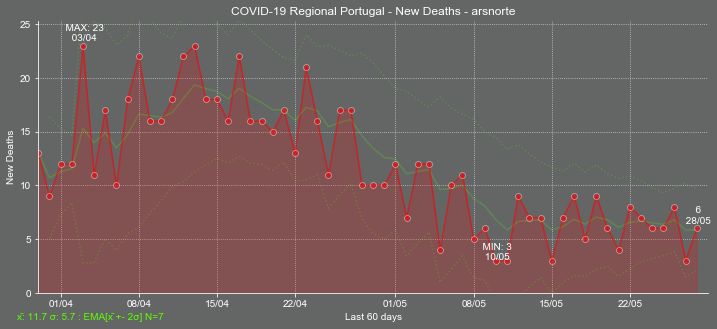

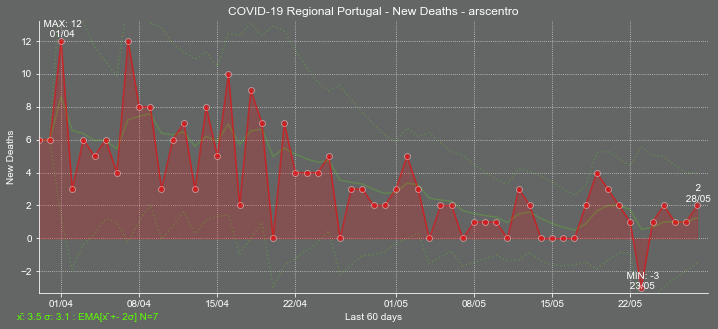

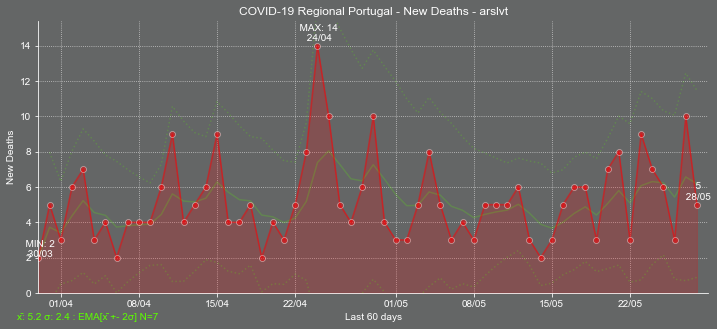

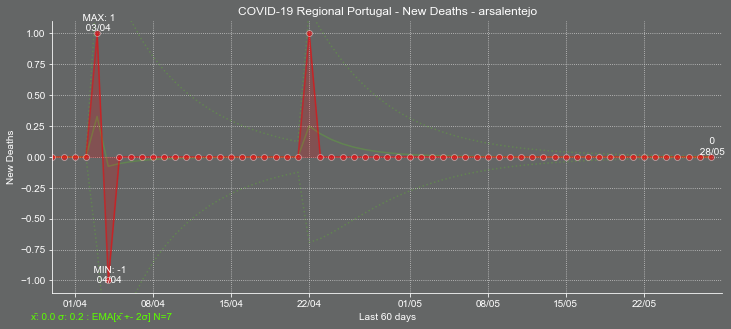

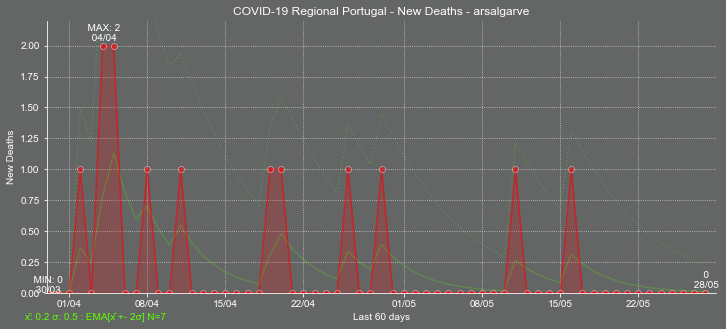

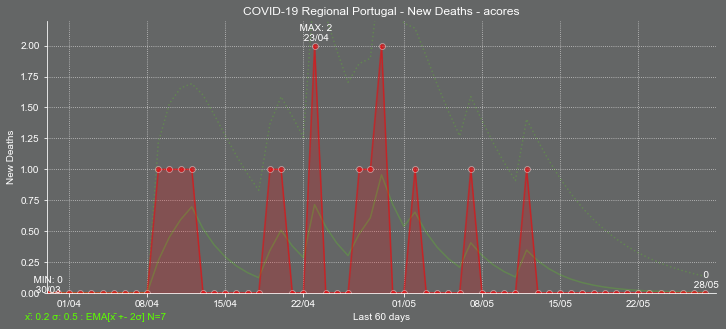

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:100: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.


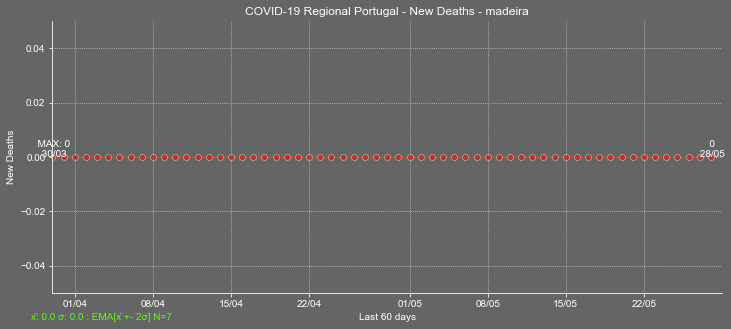

In [9]:
for region in l_regions :
    line_plot_df_tindex(
                '{}_{}_novos'.format(d_deaths['key'],region)
                ,data=df_latest
                ,title='{} - {} - {}'.format(s_title,d_new_deaths['label'],region)
                ,ylabel=d_new_deaths['label']
                ,ycolor=d_new_deaths['color']
               )

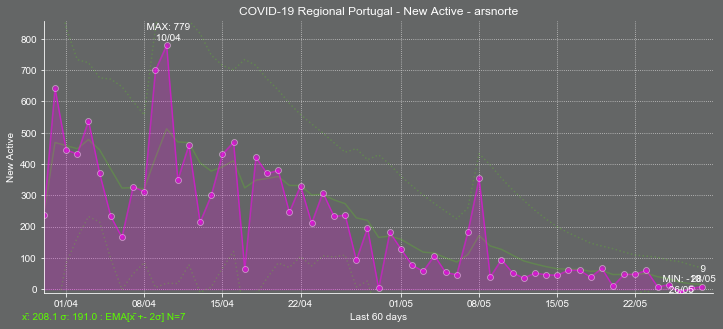

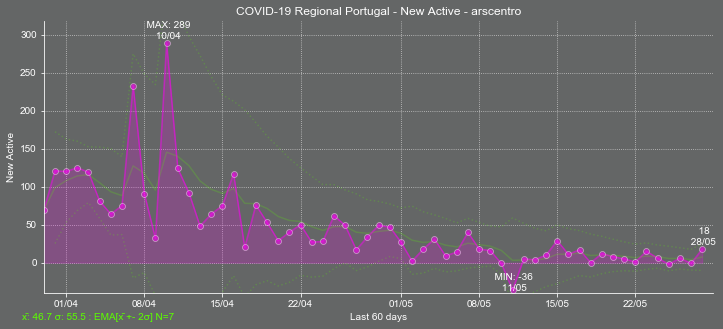

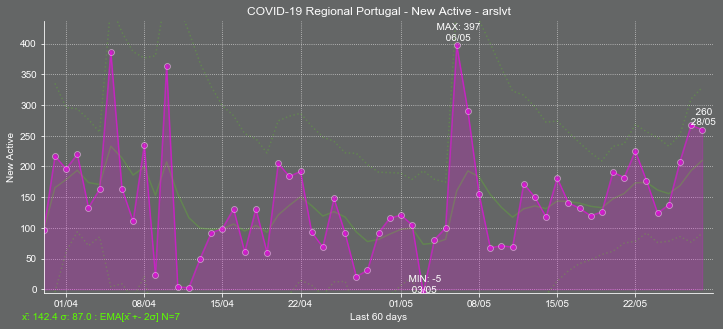

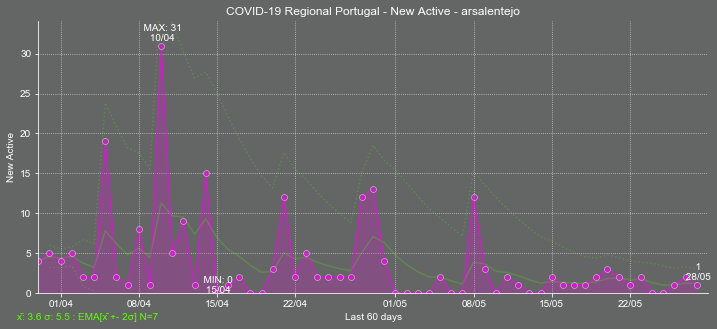

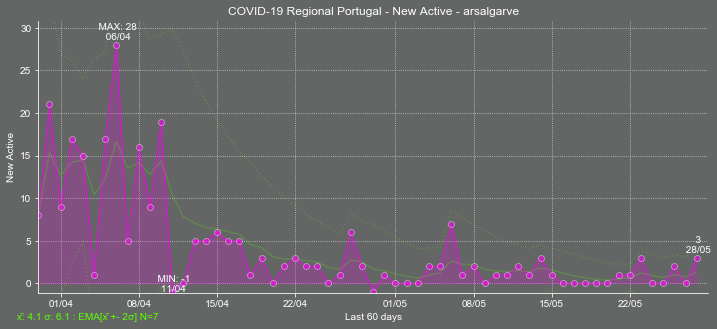

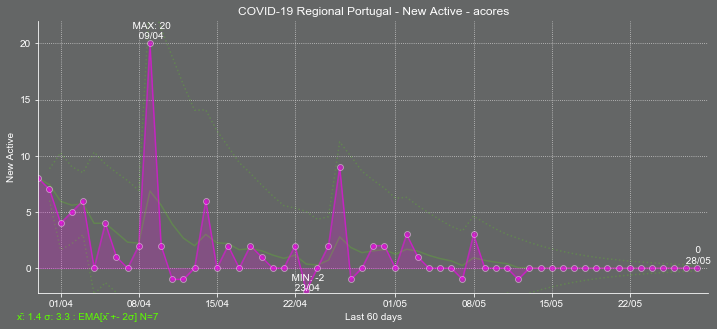

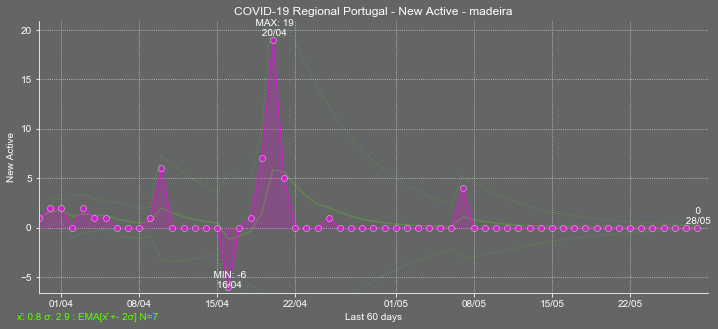

In [10]:
for region in l_regions :
    line_plot_df_tindex(
                '{}_{}_novos'.format(d_active['key'],region)
                ,data=df_latest
                ,title='{} - {} - {}'.format(s_title,d_new_active['label'],region)
                ,ylabel=d_new_active['label']
                ,ycolor=d_new_active['color']
               )

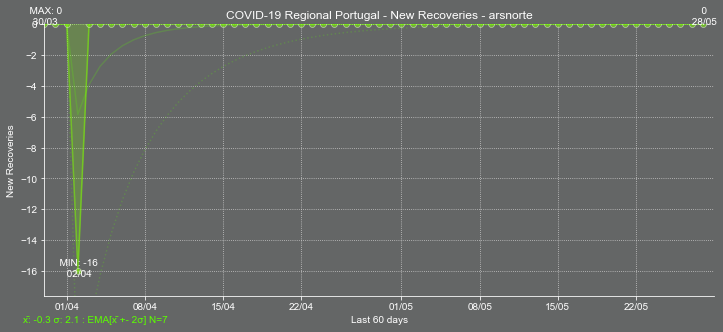

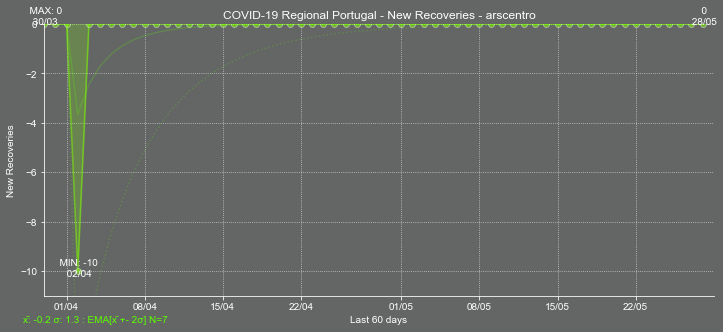

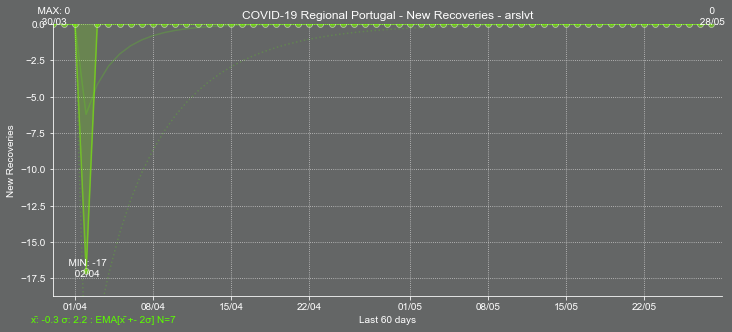

In [ ]:
for region in l_regions :
    line_plot_df_tindex(
                '{}_{}_novos'.format(d_recoveries['key'],region)
                ,data=df_latest
                ,title='{} - {} - {}'.format(s_title,d_new_recoveries['label'],region)
                ,ylabel=d_new_recoveries['label']
                ,ycolor=d_new_recoveries['color']
               )

In [ ]:
# Show saved chart images with 300 dpi
import glob
from IPython.display import Image, display
for imageName in glob.glob('{}*.png'.format(s_title)): 
    display(Image(filename=imageName))
    print(imageName)